# Resultados da pesquisa de entendimento de usuário

Esse notebook só levará em conta as duas respostas principais para a validação da proposta de solução. O restante dos gráficos de resultados pode ser encontrado no arquivo todas_as_respostas.pdf

### Importação dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\giuli\AppData\Local\Temp\ipykernel_7364\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("resultados.csv")
df.head(1)

,Você é cliente vivo?\n,Com que frequência voce utiliza o app da vivo?,Qual é a frequência mínima de atualização das informações do saldo e consumo em gigabytes no aplicativo que você considera necessária para garantir uma experiência satisfatória?,Quais dados você mais procura no app da vivo?,"\nVocê enfrenta problemas de desempenho, como lentidão ou travamentos, ao utilizar o aplicativo?",Como atrasos ou frequências de atualização menos frequentes das informações de consumo impactam sua experiência com o aplicativo?,Qual a sua satisfação com o tempo de resposta das consultas?,Qual serviço voce mais utiliza no app da vivo?,"A presença de dados desatualizados, mas com a opção de atualizá-los por meio de um botão, representaria um problema para você?"
0,Sim,Raramente,As informações precisam ser em tempo real,Saldo disponível,Às vezes enfrento problemas,Impacto Mínimo,Neutro(a),Comprar mais banda,Não


In [3]:
# Renomeia as colunas
novos_nomes_de_colunas = ['cliente_vivo', 'frequencia_de_uso_do_app', 'frequencia_minima_de_atualizacao', 'dado_mais_procurado', 'frequencia_de_lentidao_ou_travamentos', 'impacto_atrasos', 'satisfacao_tempo_de_resposta', 'servico_mais_utilizado', 'botao_de_refresh_resolveria_dados_desatualizados']
df.columns = novos_nomes_de_colunas
df.head(1)

,cliente_vivo,frequencia_de_uso_do_app,frequencia_minima_de_atualizacao,dado_mais_procurado,frequencia_de_lentidao_ou_travamentos,impacto_atrasos,satisfacao_tempo_de_resposta,servico_mais_utilizado,botao_de_refresh_resolveria_dados_desatualizados
0,Sim,Raramente,As informações precisam ser em tempo real,Saldo disponível,Às vezes enfrento problemas,Impacto Mínimo,Neutro(a),Comprar mais banda,Não


In [4]:
# Reverte a semantica da pergunta sobre o botão de refresh para facilitar o entendimento dos resultados
df['botao_de_refresh_resolveria_dados_desatualizados'] = df['botao_de_refresh_resolveria_dados_desatualizados'].replace({'Sim': 'Temp', 'Não': 'Sim'}).replace({'Temp': 'Não'})

## Análise

In [5]:
plt.style.use('dark_background')

### Dados relevantes sem filtro

C:\Users\giuli\AppData\Local\Temp\ipykernel_7364\1699570245.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")


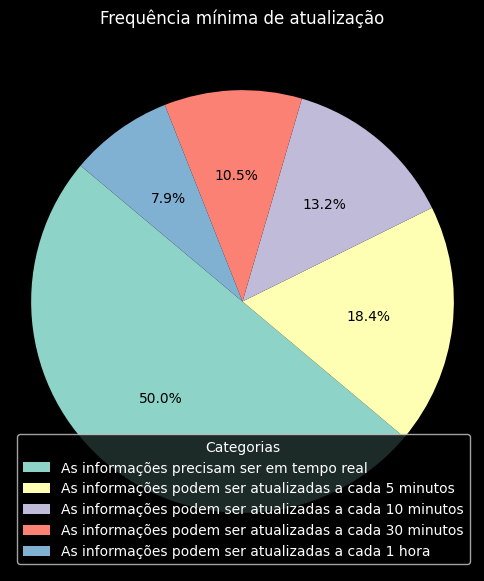

In [6]:
contagem = df['frequencia_minima_de_atualizacao'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 7))  # Define o tamanho do gráfico
patches, texts, autotexts = plt.pie(contagem, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")
plt.title('Frequência mínima de atualização')  # Adiciona um título ao gráfico
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo

# Mostrar o gráfico
plt.show()

C:\Users\giuli\AppData\Local\Temp\ipykernel_7364\2753607832.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")


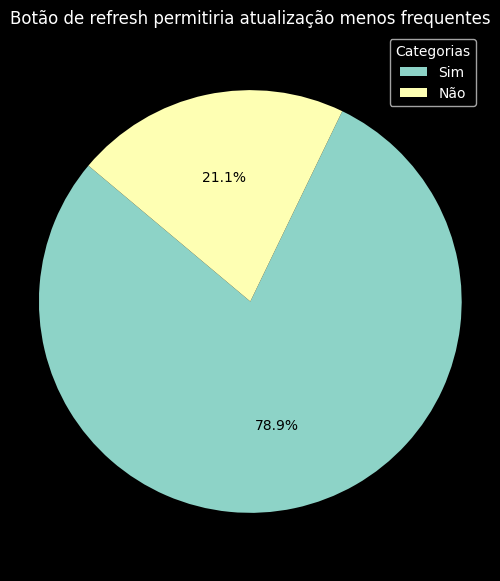

In [7]:
contagem = df['botao_de_refresh_resolveria_dados_desatualizados'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 7))  # Define o tamanho do gráfico
patches, texts, autotexts = plt.pie(contagem, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")
plt.title('Botão de refresh permitiria atualização menos frequentes')  # Adiciona um título ao gráfico
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo

# Mostrar o gráfico
plt.show()

### Dados só de clientes Vivo

In [8]:
df_clientes_vivo = df[df['cliente_vivo'] == 'Sim']
print("Quantidade de respostas de clientes Vivo: " + str(df_clientes_vivo.shape[0]))

Quantidade de respostas de clientes Vivo: 30


C:\Users\giuli\AppData\Local\Temp\ipykernel_7364\496388281.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")


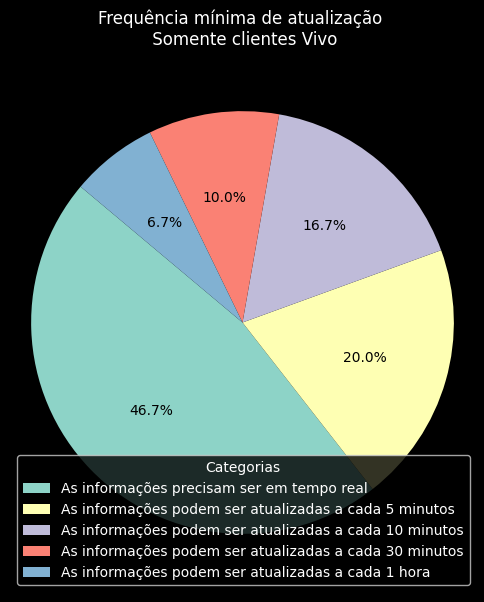

In [9]:
contagem = df_clientes_vivo['frequencia_minima_de_atualizacao'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 7))  # Define o tamanho do gráfico
patches, texts, autotexts = plt.pie(contagem, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")
plt.title('Frequência mínima de atualização \n Somente clientes Vivo')  # Adiciona um título ao gráfico
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo

# Mostrar o gráfico
plt.show()

C:\Users\giuli\AppData\Local\Temp\ipykernel_7364\948455403.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")


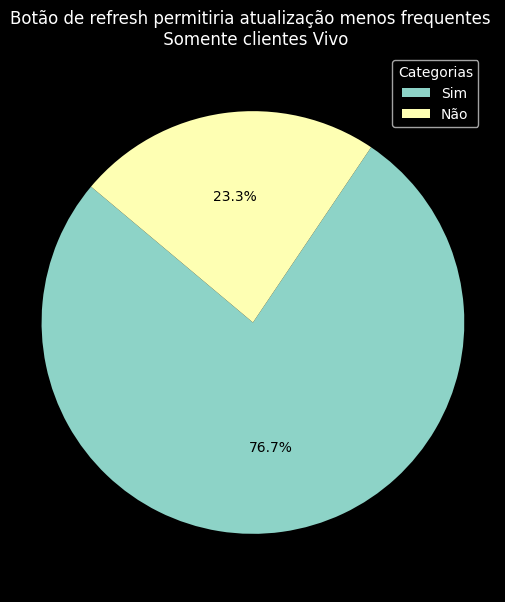

In [10]:
contagem = df_clientes_vivo['botao_de_refresh_resolveria_dados_desatualizados'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 7))  # Define o tamanho do gráfico
patches, texts, autotexts = plt.pie(contagem, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")
plt.title('Botão de refresh permitiria atualização menos frequentes \n Somente clientes Vivo')  # Adiciona um título ao gráfico
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo

# Mostrar o gráfico
plt.show()

### Dados só dos clientes que utilizam o app no mínimo mensalmente

In [11]:
df_clientes_frequentes = df[df['frequencia_de_uso_do_app'].isin(['Diariamente', 'Semanalmente', 'Mensalmente'])]
print("Quantidade de respostas de clientes Vivo: " + str(df_clientes_frequentes.shape[0]))

Quantidade de respostas de clientes Vivo: 17


C:\Users\giuli\AppData\Local\Temp\ipykernel_7364\2203002874.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")


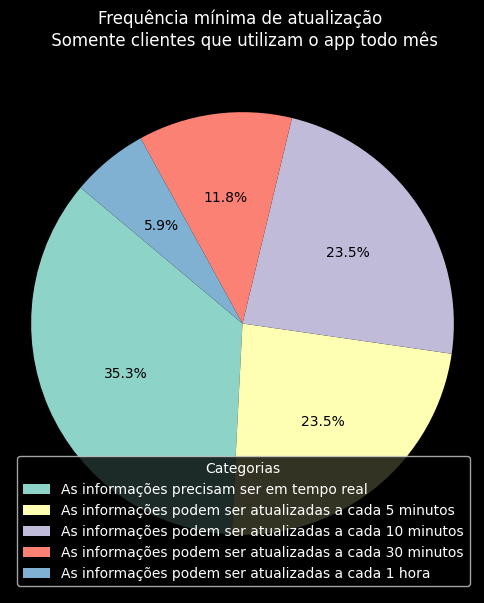

In [12]:
contagem = df_clientes_frequentes['frequencia_minima_de_atualizacao'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 7))  # Define o tamanho do gráfico
patches, texts, autotexts = plt.pie(contagem, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")
plt.title('Frequência mínima de atualização \n Somente clientes que utilizam o app todo mês')  # Adiciona um título ao gráfico
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo

# Mostrar o gráfico
plt.show()

C:\Users\giuli\AppData\Local\Temp\ipykernel_7364\225959082.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")


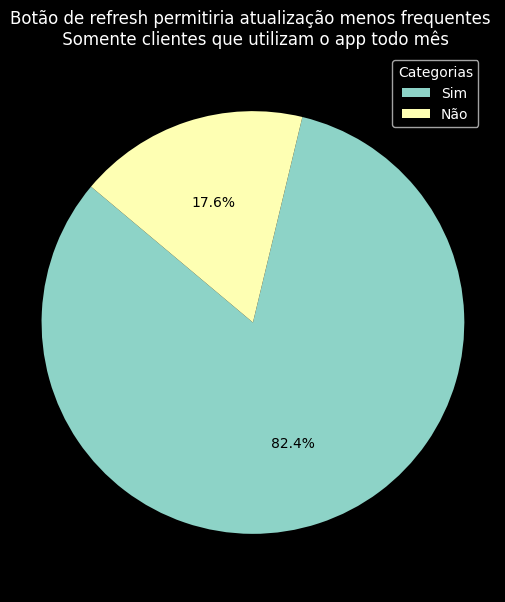

In [13]:
contagem = df_clientes_frequentes['botao_de_refresh_resolveria_dados_desatualizados'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 7))  # Define o tamanho do gráfico
patches, texts, autotexts = plt.pie(contagem, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
plt.legend(patches, labels=contagem.index, title="Categorias", loc="best")
plt.title('Botão de refresh permitiria atualização menos frequentes \n Somente clientes que utilizam o app todo mês')  # Adiciona um título ao gráfico
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo

# Mostrar o gráfico
plt.show()

## Conclusão

### Todas as respostas

Analisando os resultados sem filtros, percebemos que a resposta mais frequente (metade das respostas) relativa a frequência mínima de atualização é que os dados precisam ser mostrados em tempo real.
Dito isso, três quartos dos respondentes aceitam atualizações menos frequentes caso haja um botão de refresh que busque as informações atualizadas.

### Somente clientes Vivo

Mantendo somente os clientes Vivo as porcentagens ficaram praticamente iguais, com uma leve redução na porcentagem de pessoas que precisam das atualizações em tempo real, mas uma redução também da aceitação relativa a ideia do botão de refresh.

### Somente clientes que utilizam o app todo mês

Um detalhe importante aqui é que mantendo somente as respostas dos clientes que utilizam o app todo mês perdemos mais de metade das respostas, tornando os resultados menos significativos, mas as respostas dos clientes frequentes demonstram mais permissividade em relação a frequência mínima de atualização e uma maior aceitação da ideia do botão de refresh.

### Conclusão final

Dado que mais de 4 a cada 5 clientes se mostraram favoráveis a ideia (dado que haja botão de refresh), faz-se evidente a viabilidade da solução do ponto de vista do usuário.
Ademais, vendo que somente por volta de 30% dos clientes responderam que nunca enfrentam problemas como travamentos ou atrasos (gráfico disponível em todas_as_respostas.pdf), e que esse aspecto é diretamente atacado por nossa solução, a solução se torna ainda mais interessante.